<a href="https://colab.research.google.com/github/MrA-png/Recurrent-Neural/blob/main/Recurrent_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense

# Data contoh (suhu harian dalam deret waktu)
data = np.array([35,35,35,34,36,36,34,34,36,33,36,35,35,
35,34,34,35,35,35,34,36,35,36,35,36,35,36,36,36,36])
sequence_length = 5 # Panjang urutan waktu yang akan digunakan
# Pemisahan Data Training & Data Test

def prepare_data(data, sequence_length):
  X, y = [], []
  for i in range(len(data) - sequence_length):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length])
  return np.array(X), np.array(y)
X, y = prepare_data(data, sequence_length)

# Membuat Model RNN sederhana

model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

# Kompilasi Model

model.compile(optimizer='adam', loss='mse')

# Pelatihan Model

model.fit(X.reshape(-1, sequence_length, 1), y, epochs=100, verbose=0)

# Menghitung Loss pada Data Pelatihan

loss = model.evaluate(X.reshape(-1, sequence_length, 1), y)
print("Loss pada data pelatihan:", loss)

# Membuat prediksi untuk nilai berikutnya
next_sequence = np.array([34,36,36,34,34])
# Misalkan ini adalah data terbaru
next_sequence = next_sequence.reshape(1, sequence_length, 1)
predicted_temperature = model.predict(next_sequence) #34
print("Prediksi suhu berikutnya:", predicted_temperature[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - loss: 0.7972
Loss pada data pelatihan: 0.7972248792648315
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Prediksi suhu berikutnya: 34.59032


SOAL no 2

In [ ]:
import pandas as pd

data_suhu = pd.DataFrame({
    'Date' : ['2022-11-21','2022-11-22','2022-11-23','2022-11-24'],
    'Temperature' : [30.6, 32.1, 31.7, 27.4]
})

data_suhu['Loss'] = data_suhu['Temperature'].diff().apply(lambda x: x if x < 0 else 0)

min_loss_suhu = data_suhu[data_suhu['Loss'] != 0].nsmallest(1, 'Loss')

min_loss_suhu[['Date', 'Temperature', 'Loss']]



,Date,Temperature,Loss
3,2022-11-24,27.4,-4.3


In [ ]:
from os import times
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

file_path = 'stock.csv'
data = pd.read_csv(file_path)

features = data[['Open', 'High', 'Low', 'Volume']].values
target = data['Close'].values

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

target_scaled = target.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, shuffle=False)

timesteps = 5
X_train_reshaped = np.array([X_train[i:i+timesteps] for i in range(len(X_train)-timesteps)])
y_train_reshaped = y_train[timesteps:]

X_test_reshaped = np.array([X_test[i:i+timesteps] for i in range(len(X_test)-timesteps)])
y_test_reshaped = y_test[timesteps:]

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(timesteps, X_train.shape[1])),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_reshaped, y_train_reshaped, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test_reshaped))

loss = model.evaluate(X_test_reshaped, y_test_reshaped)
print(f"Loss pada data pelatihan: {loss}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 18269.5879 - val_loss: 27009.6055
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18207.8926 - val_loss: 26875.1504
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18192.0840 - val_loss: 26749.0000
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18121.4141 - val_loss: 26606.2520
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18183.4980 - val_loss: 26416.6270
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17798.8594 - val_loss: 26114.6719
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17578.8457 - val_loss: 25603.3125
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17509.7715 - val_loss: 24715.9004
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17155.2656 - val_loss: 23141.8047
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16374.2412 - val_loss: 20373.5488
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14659.5205 - val_loss: 15780.4102
Epoch 12/20
7

In [ ]:
train_loss_min = np.min(history.history['loss'])
val_loss_min = np.min(history.history['val_loss'])

print(f"Loss terkecil pada data pelatihan: {train_loss_min}")
print(f"Loss terkecil pada data validasi: {val_loss_min}")

test_loss = model.evaluate(X_test_reshaped, y_test_reshaped)
print(f"Loss pada data pengujian: {test_loss}")

Loss terkecil pada data pelatihan: 454.49884033203125
Loss terkecil pada data validasi: 1722.4267578125
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3716.5681
Loss pada data pengujian: 4109.07861328125


Training RNN with 50 units...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - loss: 0.6763 - val_loss: 1.3636
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3768 - val_loss: 0.9283
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2849 - val_loss: 0.8692
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2234 - val_loss: 0.8442
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2939 - val_loss: 0.6617
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1327 - val_loss: 0.5564
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2009 - val_loss: 0.7228
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2288 - val_loss: 0.8807
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2114 - val_loss: 0.8422
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1493 - val_loss: 0.6986
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1137 - val_loss: 0.5687
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1445 - val_loss: 0.5646


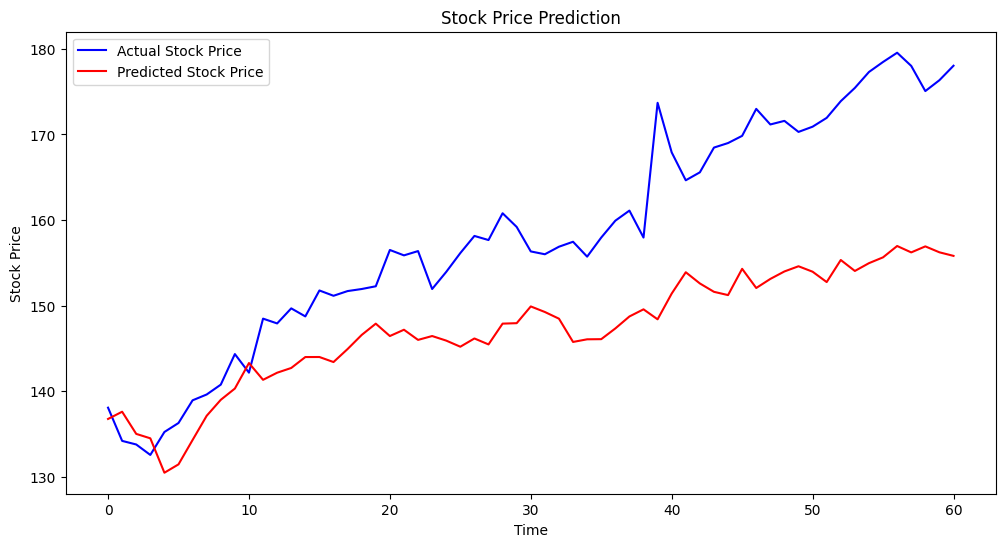

Predicted stock price range: 130.48 - 156.96


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# 1. Load data
df = pd.read_csv('stock.csv')

# 2. Split data into training and testing
df_train = df[df['Date'] <= '2023-12-01']['Close']
df_test = df[df['Date'] > '2023-12-01']['Close']

# 3. Scale the data
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train.values.reshape(-1, 1))
df_test_scaled = scaler.transform(df_test.values.reshape(-1, 1))

# 4. Prepare the data for RNN
def create_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_dataset(df_train_scaled, time_steps)
X_test, y_test = create_dataset(df_test_scaled, time_steps)

# Reshape the data to fit the RNN input shape (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 5. Build the RNN model
def build_rnn(units):
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=units, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

# 6. Compile and train the model
def train_rnn(model):
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    return history

# Train with different units and find the best model based on validation loss
units_list = [50, 100, 150]  # Try different units
best_loss = float("inf")
best_model = None

for units in units_list:
    print(f"Training RNN with {units} units...")
    model = build_rnn(units)
    history = train_rnn(model)
    val_loss = min(history.history['val_loss'])
    if val_loss < best_loss:
        best_loss = val_loss
        best_model = model

# 7. Evaluate the best model
train_loss = best_model.evaluate(X_train, y_train)
test_loss = best_model.evaluate(X_test, y_test)

print(f"Training Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

# 8. Make predictions
y_pred_scaled = best_model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# 9. Plot the results
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, color='blue', label='Actual Stock Price')
plt.plot(y_pred, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 10. Print prediction range
print(f"Predicted stock price range: {np.min(y_pred):.2f} - {np.max(y_pred):.2f}")
